In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("003490.csv", encoding='cp949')
df_reverse = df.iloc[::-1]

In [24]:
df_reverse.head()

일자      시가      고가      저가      종가 전일비 Unnamed: 6   등락률  \
1239  2014/12/18  47,000  47,850  45,900  47,600   ▲        100  0.21   
1238  2014/12/19  48,400  49,500  48,350  48,900   ▲      1,300  2.73   
1237  2014/12/22  48,250  48,300  47,150  47,300   ▼     -1,600 -3.27   
1236  2014/12/23  47,800  48,300  47,200  47,450   ▲        150  0.32   
1235  2014/12/24  47,000  47,600  46,800  47,500   ▲         50  0.11   

          거래량  금액(백만)   신용비        개인       기관   외인(수량)      외국계     프로그램  \
1239  612,117  28,678  0.54  -206,617   33,941  169,399  195,335  158,717   
1238  623,387  30,534  0.51   -49,168    4,153   30,855  -60,139  -33,613   
1237  430,494  20,448  0.53    73,759  -45,298  -22,375   41,663   38,952   
1236  350,125  16,697  0.50   -18,882   13,243    7,394  -13,931   91,366   
1235  176,043   8,314  0.53     2,853   -6,202  -12,165   -3,554   14,729   

        외인비  
1239  18.69  
1238  18.75  
1237  18.71  
1236  18.72  
1235  18.70

In [25]:
df_reverse.tail()

일자      시가      고가      저가      종가 전일비 Unnamed: 6   등락률      거래량  \
4  2020/01/02  28,500  28,550  27,750  27,850   ▼       -650 -2.28  303,459   
3  2020/01/03  28,000  28,150  27,250  27,300   ▼       -550 -1.97  572,272   
2  2020/01/06  26,850  27,100  26,000  26,500   ▼       -800 -2.93  690,224   
1  2020/01/07  26,500  27,150  26,400  26,850   ▲        350  1.32  388,103   
0  2020/01/08  26,450  26,700  25,950  26,300   ▼       -550 -2.05  676,198   

   금액(백만)   신용비       개인       기관   외인(수량)      외국계     프로그램    외인비  
4   8,503  0.35   31,746   57,761  -83,399  -86,106  -38,744  18.03  
3  15,794  0.34  106,151  -71,960  -24,491  -55,847  -20,717  18.01  
2  18,262  0.34   49,022  -83,359   52,646  -14,894   70,836  18.06  
1  10,410  0.36  -20,232   41,059  -21,645  -32,686    7,617  18.04  
0  17,787  0.00   32,722   39,186  -67,776  -11,324  -74,472  17.97

In [26]:
x = df_reverse[['종가', '거래량']].values
y = df_reverse[['종가']].values

In [32]:
for i in range(len(x)):
    for j in range(2):
        x[i][j] = x[i][j].replace(',', '')
        y[i][0] = y[i][0].replace(',', '')

In [33]:
x_shift = x[:][0:-1]
y_shift = y[:][1:]

In [52]:
x_train = x_shift[:419][:]
x_test = x_shift[419:][:]
y_train = y_shift[:419][:]
y_test = y_shift[419:][:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((419, 2), (820, 2), (419, 1), (820, 1))

In [67]:
lookback = 5

x_train_sequence = []
y_train_sequence = []

for i in range(len(y_train)-lookback+1):
    x_train_sequence.append(x_train[i:i+lookback])
    y_train_sequence.append(y_train[i+lookback-1])

In [68]:
type(x_train_sequence)

list

In [69]:
import numpy as np
x_input = np.array(x_train_sequence)
y_input = np.array(y_train_sequence)

In [70]:
type(x_input)

numpy.ndarray

In [73]:
x_input.shape, y_input.shape

((415, 5, 2), (415, 1))

In [75]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [76]:
model = Sequential()
model.add(LSTM(128, input_shape=(5,2)))
model.add(Dense(1))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               67072     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 67,201
Trainable params: 67,201
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

In [ ]:
h = model.fit(x_input, y_input, epochs=200)

Epoch 1/200
415/415 [==============================] - 0s 333us/step - loss: 1248143493.5518 - acc: 0.0000e+00
Epoch 2/200
415/415 [==============================] - 0s 284us/step - loss: 1248121374.2265 - acc: 0.0000e+00
Epoch 3/200
415/415 [==============================] - 0s 255us/step - loss: 1248099111.7880 - acc: 0.0000e+00
Epoch 4/200
415/415 [==============================] - 0s 255us/step - loss: 1248076894.9976 - acc: 0.0000e+00
Epoch 5/200
415/415 [==============================] - 0s 250us/step - loss: 1248054726.0145 - acc: 0.0000e+00
Epoch 6/200
415/415 [==============================] - 0s 248us/step - loss: 1248032563.8169 - acc: 0.0000e+00
Epoch 7/200
415/415 [==============================] - 0s 250us/step - loss: 1248010295.2096 - acc: 0.0000e+00
Epoch 8/200
415/415 [==============================] - 0s 257us/step - loss: 1247988050.9687 - acc: 0.0000e+00
Epoch 9/200
415/415 [==============================] - 0s 272us/step - loss: 1247965878.5928 - acc: 0.0000e+00
E

Text(0.5, 1.0, 'Loss')

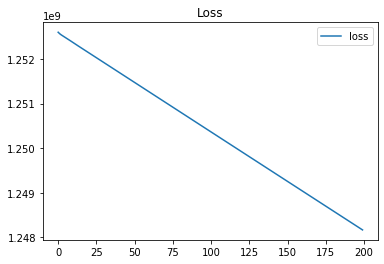

In [95]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label='loss')
plt.legend()
plt.title('Loss')